<a href="https://colab.research.google.com/github/Panperception/SCC022/blob/main/Week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload the data files and the setup file from your local disk to the folder in the left (click on the folder button to see)
### Files needed:
 1. disease-cases.csv
 2. NOTT_2015.csv
 3. requirements.txt



## Install requirements


In [5]:
!pip install -r requirements.txt

### Run the solution codes step by step

### 0. Initialization

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.interactive(True)
cvd = pd.read_csv("disease-cases.csv")


#### 1. Statics on the whole dataset

In [20]:
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,01/02/2022,94
1,E07000040,East Devon,ltla,01/02/2022,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,03/03/2020,0
264589,E09000017,Hillingdon,ltla,02/03/2020,1


In [21]:
pd.options.display.max_rows = 10
pd.options.display.min_rows = 5
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,01/02/2022,94
1,E07000040,East Devon,ltla,01/02/2022,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,03/03/2020,0
264589,E09000017,Hillingdon,ltla,02/03/2020,1


In [15]:
cvd['Specimen date'] = pd.to_datetime(cvd['Specimen date'], dayfirst=True)
cvd


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
0,E06000003,Redcar and Cleveland,ltla,2022-02-01,94
1,E07000040,East Devon,ltla,2022-02-01,176
...,...,...,...,...,...
264588,E09000017,Hillingdon,ltla,2020-03-03,0
264589,E09000017,Hillingdon,ltla,2020-03-02,1


In [16]:
cvd.describe()

,Specimen date,Daily lab-confirmed cases
count,264590,264590.000000
mean,2021-02-18 04:16:15.601496832,65.576004
min,2020-01-11 00:00:00,0.000000
25%,2020-08-28 00:00:00,4.000000
50%,2021-02-18 00:00:00,21.000000
75%,2021-08-11 00:00:00,76.000000
max,2022-02-01 00:00:00,4303.000000
std,NaN,130.395361


<Axes: xlabel='Specimen date'>

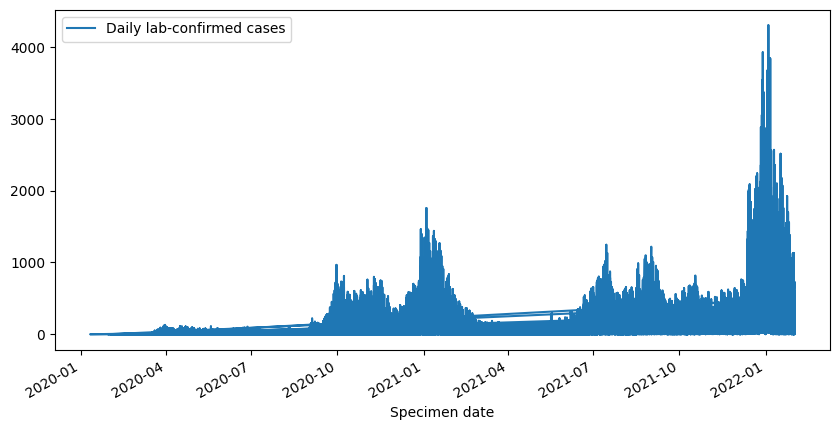

In [17]:
cvd.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

#### Check samples from London area

In [22]:
cvd_london = cvd[cvd['Area name'] == 'London']
cvd_london

,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
176161,E09000012,London,ltla,01/02/2022,134
176174,E09000012,London,ltla,31/01/2022,281
...,...,...,...,...,...
186576,E09000012,London,ltla,07/03/2020,0
186584,E09000012,London,ltla,06/03/2020,1


<Axes: xlabel='Specimen date'>

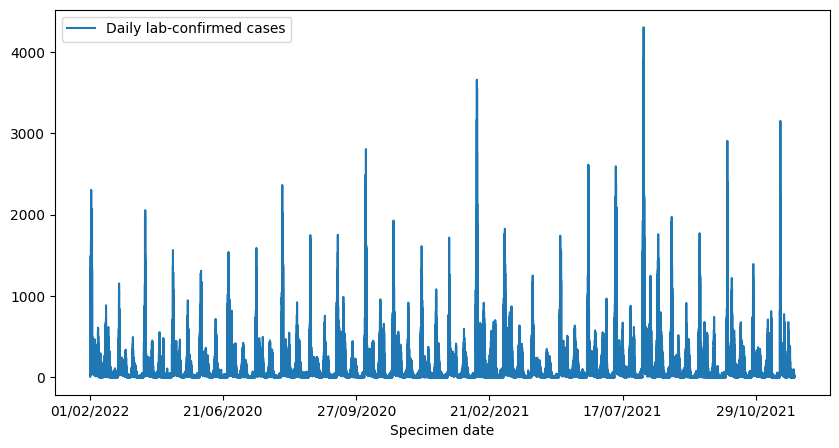

In [23]:
cvd.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))


In [26]:
cvd_london = cvd_london.sort_values(by='Specimen date')
cvd_london


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
182099,E09000012,London,ltla,01/01/2021,200
176624,E09000012,London,ltla,01/01/2022,359
...,...,...,...,...,...
182114,E09000012,London,ltla,31/12/2020,422
176639,E09000012,London,ltla,31/12/2021,665


<Axes: xlabel='Specimen date'>

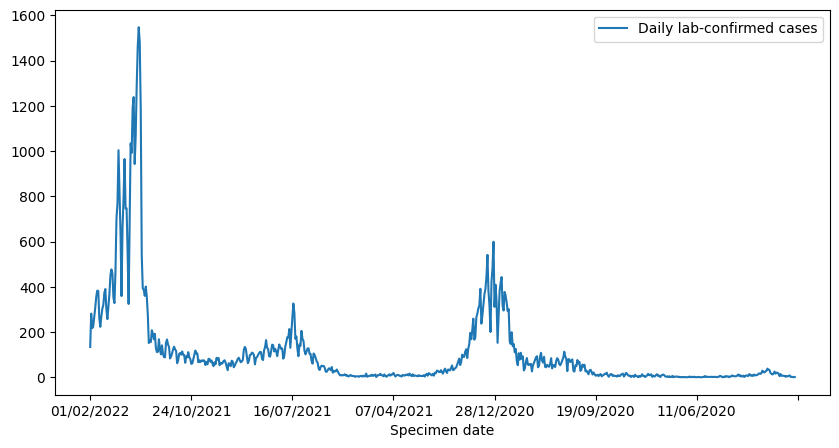

In [25]:
cvd_london.plot(x="Specimen date", y="Daily lab-confirmed cases", figsize=(10, 5))

#### 3. Compare London and Lancaster

In [31]:
cvd_lancaster = cvd[cvd['Area name'] == 'Lancaster']
cvd_lancaster = cvd_lancaster.sort_values(by='Specimen date')
cvd_lancaster


,Area code,Area name,Area type,Specimen date,Daily lab-confirmed cases
129946,E07000121,Lancaster,ltla,01/01/2021,34
124471,E07000121,Lancaster,ltla,01/01/2022,292
...,...,...,...,...,...
129961,E07000121,Lancaster,ltla,31/12/2020,75
124486,E07000121,Lancaster,ltla,31/12/2021,390


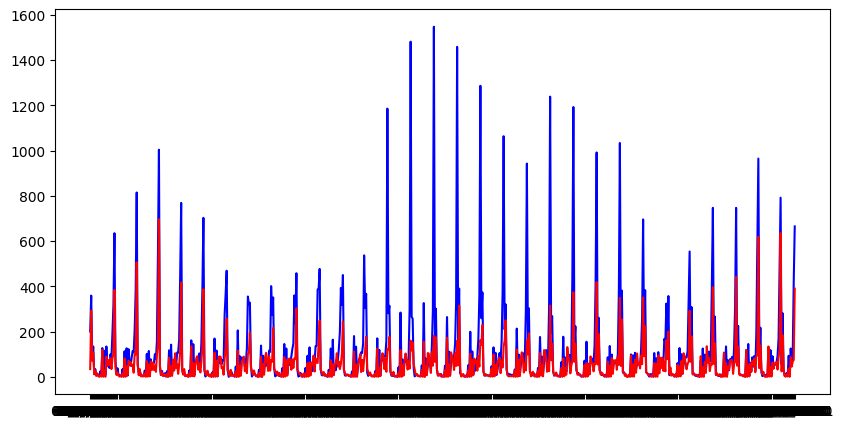

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(cvd_london["Specimen date"], cvd_london["Daily lab-confirmed cases"], 'b')
plt.plot(cvd_lancaster["Specimen date"], cvd_lancaster["Daily lab-confirmed cases"], 'r')
plt.show()
